In [105]:
import os
import sys
import datetime as dt

import numpy as np
import pandas as pd
from scipy import stats, constants
from scipy.special import comb, perm, factorial, expit
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
fp_list_master = ['C:', 'Users', 'szahn', 'Dropbox', 'Statistics & Machine Learning', 'coursera_ml_notes']
fp = os.sep.join(fp_list_master)
fp_fig = fp + os.sep + 'LaTeX Notes' + os.sep + 'Figures'
print(os.path.isdir(fp), os.path.isdir(fp_fig))

True True


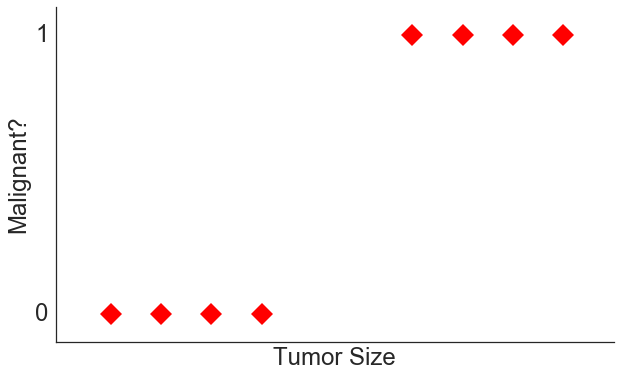

In [48]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10]
y_list = [0, 0, 0, 0, 1, 1, 1, 1]

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(-0.1, 11)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor.pdf')

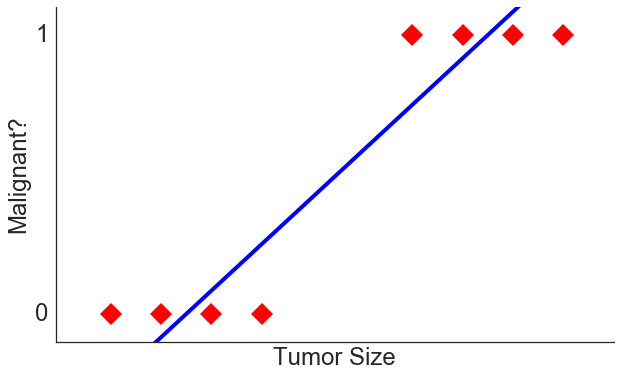

In [51]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10]
y_list = [0, 0, 0, 0, 1, 1, 1, 1]

x_list_reg = list(range(11))
regline = lambda x: (1/6) * (x - 1) - 0.25
y_list_reg = [regline(x) for x in x_list_reg]

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(-0.1, 11)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor_linreg1.pdf')

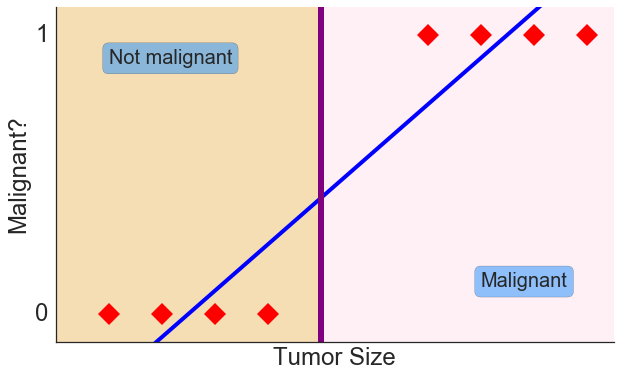

In [87]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10]
y_list = [0, 0, 0, 0, 1, 1, 1, 1]

x_list_reg = list(range(11))
regline = lambda x: (1/6) * (x - 1) - 0.25
y_list_reg = [regline(x) for x in x_list_reg]

textstr1 = 'Not malignant'
textstr2 = 'Malignant'
props = dict(boxstyle='round', facecolor='dodgerblue', alpha=0.5)

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(0, 10.5)
    
    plt.axvline(x=5, color='purple', linewidth=6)
    plt.axvspan(0, 5, color='wheat')
    plt.axvspan(5, 11, color='lavenderblush')
    
    ax.text(1, 0.95, textstr1, fontsize=20, verticalalignment='top', bbox=props)
    ax.text(8, 0.15, textstr2, fontsize=20, verticalalignment='top', bbox=props)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor_linreg1_threshold.pdf')

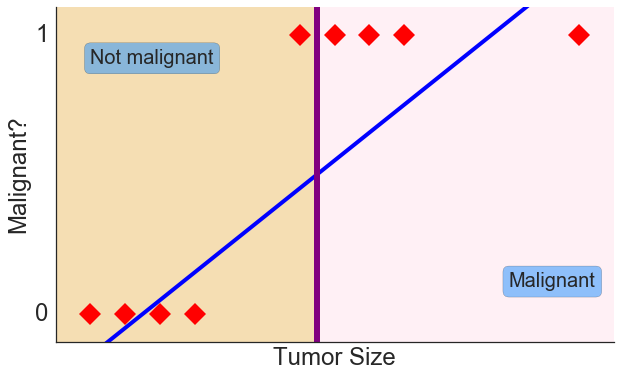

In [104]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10, 15]
y_list = [0, 0, 0, 0, 1, 1, 1, 1, 1]

x_list_reg = list(range(16))
regline = lambda x: (1/10) * x - 0.25
y_list_reg = [regline(x) for x in x_list_reg]


textstr1 = 'Not malignant'
textstr2 = 'Malignant'
props = dict(boxstyle='round', facecolor='dodgerblue', alpha=0.5)

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(0, 16)
    
    plt.axvline(x=7.5, color='purple', linewidth=6)
    plt.axvspan(0, 7.5, color='wheat')
    plt.axvspan(7.5, 16, color='lavenderblush')
    
    ax.text(1, 0.95, textstr1, fontsize=20, verticalalignment='top', bbox=props)
    ax.text(13, 0.15, textstr2, fontsize=20, verticalalignment='top', bbox=props)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor_linreg1_newpoint.pdf')

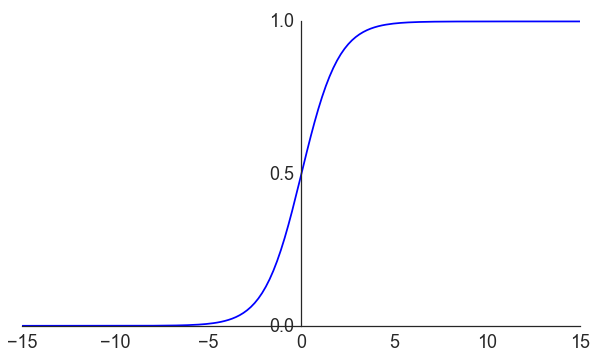

In [140]:
x_list = np.linspace(-15, 15, 150)
y_list = expit(x_list)


with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'b')
    plt.xlim(-15, 15)
    plt.ylim(-0.05, 1.05)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.yticks([0, 0.5, 1], fontsize=18)
    plt.xticks(fontsize=18)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg2_sigmoid_func_plot.pdf')